In [1]:
import anndata as ad
import episcanpy.api as epi
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import time

import episcanpy
print(episcanpy.__version__)

0.2.1+15.g20e1b1d


/home/icb/anna.danese/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [109]:
sc.settings.set_figure_params(dpi=80)

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=500,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [7]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129785/suppl/GSE129785%5FscATAC%2DHematopoiesis%2DAll%2Emtx%2Egz

--2020-10-09 12:45:44--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129785/suppl/GSE129785%5FscATAC%2DHematopoiesis%2DAll%2Emtx%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 2607:f220:41e:250::7, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6401829819 (6.0G) [application/x-gzip]
Saving to: ‘GSE129785_scATAC-Hematopoiesis-All.mtx.gz’

GSE129785_scATAC-He 100%[===================>]   5.96G  19.4MB/s    in 5m 16s  

2020-10-09 13:01:45 (19.3 MB/s) - ‘GSE129785_scATAC-Hematopoiesis-All.mtx.gz’ saved [6401829819/6401829819]



In [10]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129785/suppl/GSE129785%5FscATAC%2DHematopoiesis%2DAll%2Emtx%2Egz

--2020-10-09 13:04:04--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129785/suppl/GSE129785%5FscATAC%2DHematopoiesis%2DAll%2Emtx%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 2607:f220:41e:250::7, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6401829819 (6.0G) [application/x-gzip]
Saving to: ‘GSE129785_scATAC-Hematopoiesis-All.mtx.gz’

GSE129785_scATAC-He 100%[===================>]   5.96G  17.7MB/s    in 5m 37s  

2020-10-09 13:46:17 (18.1 MB/s) - ‘GSE129785_scATAC-Hematopoiesis-All.mtx.gz’ saved [6401829819/6401829819]



In [12]:
!gunzip -a GSE129785_scATAC-Hematopoiesis-All.mtx.gz

gzip: option --ascii ignored on this system

gzip: GSE129785_scATAC-Hematopoiesis-All.mtx.gz: not in gzip format


In [30]:
adata = sc.read("GSE129785_scATAC-Hematopoiesis-All.mtx")

In [31]:
adata = adata.T

In [32]:
adata

AnnData object with n_obs × n_vars = 63882 × 571400

In [35]:
!gunzip GSE129785_scATAC-Hematopoiesis-All.cell_barcodes.txt.gz

In [42]:
obs = pd.read_csv("GSE129785_scATAC-Hematopoiesis-All.cell_barcodes.txt", sep="\t")

In [44]:
adata.obs = obs

In [45]:
adata.obs_names = obs["Barcodes"]

In [53]:
del adata.obs["Barcodes"]

In [46]:
var = pd.read_csv("GSE129785_scATAC-Hematopoiesis-All.peaks.txt")

In [48]:
adata.var = var
adata.var_names = var["Feature"]

In [56]:
del adata.var["Feature"]

In [57]:
adata.write("Greenleaf_large_raw_mat.h5ad")

In [58]:
print(np.max(adata.X))
epi.pp.binarize(adata)
print(np.max(adata.X))

57.0
1.0


In [59]:
epi.pp.filter_cells(adata, min_features=100)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 63882 × 571400
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'nb_features'

In [60]:
epi.pp.filter_features(adata, min_cells=50)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 63882 × 556259
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'nb_features'
    var: 'n_cells'

In [61]:
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 63882 × 556259
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'nb_features', 'log_nb_features'
    var: 'n_cells'

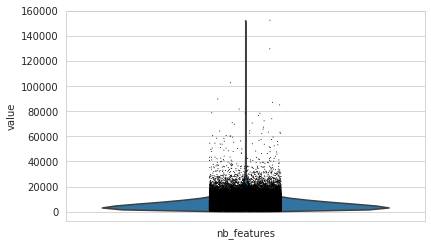

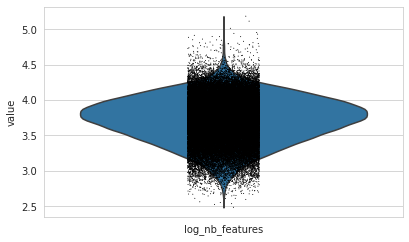

In [62]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

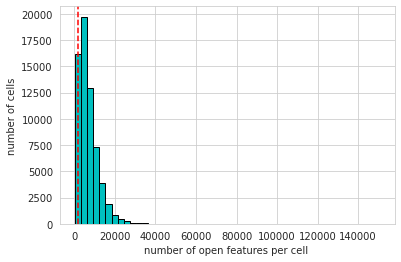

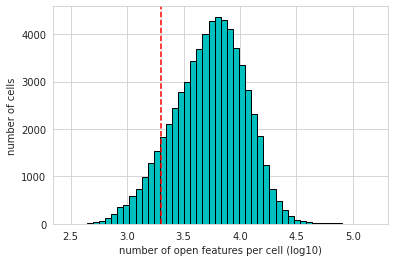

In [64]:
# set a minimum number of cells to keep 
min_features = 2000

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save='greenleaf_large_coverage_cells.png')
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save='greenleaf_large_coverage_cells_log10.png')

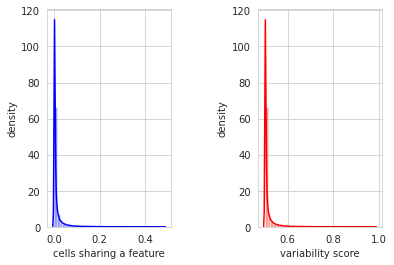

In [65]:
epi.pp.cal_var(adata)

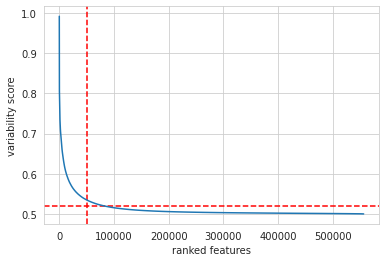

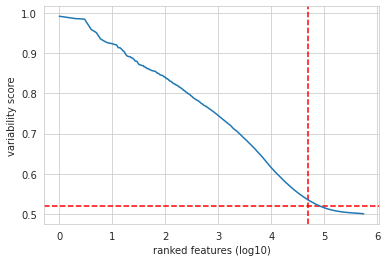

In [69]:
min_score_value = 0.52
nb_feature_selected = 50000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_greenleaf_large.png')

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_greenleaf_large.png')

In [68]:
epi.pp.filter_cells(adata, min_features=2000)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 57177 × 556259
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'prop_shared_cells', 'variability_score'

In [70]:
adata1 = adata[:,adata.var["variability_score"] > 0.52].copy()
adata1

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 57177 × 83823
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'prop_shared_cells', 'variability_score'

In [71]:
epi.pp.normalize_per_cell(adata1)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [72]:
epi.pp.lazy(adata1)

In [78]:
adata1.obs["Internal_Name"] = adata1.obs["Internal_Name"].astype("category")

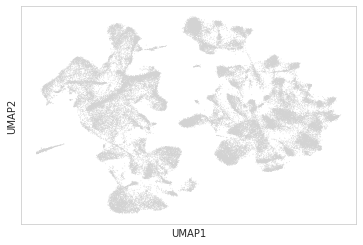

In [80]:
sc.pl.umap(adata1)

In [95]:
annot = []
bla = []
for elem in adata1.obs["Internal_Name"]:
    elem = elem.split("_")
    annot.append(elem[0])
    bla.append(elem[1])
    
adata1.obs["broad_annot"] = annot    

In [96]:
elem

['pDC', '76']

... storing 'broad_annot' as categorical


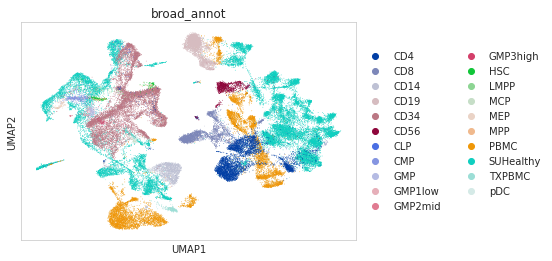

In [90]:
sc.pl.umap(adata1, color="broad_annot")

In [97]:
adata1.write("Greenleaf_large_processed.h5ad")

... storing 'broad_annot' as categorical


In [146]:
adata1

AnnData object with n_obs × n_vars = 57177 × 83823
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'nb_features', 'log_nb_features', 'n_counts', 'broad_annot', 'keep'
    var: 'n_cells', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'umap', 'Internal_Name_colors', 'broad_annot_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [149]:
annot = []
for elem in adata1.obs["Clusters"]:
    if elem == "Cluster1":
        annot.append("01_HSC_MPP")
    elif elem == "Cluster2":
        annot.append("02_MEP")
    elif elem == "Cluster3":
        annot.append("03_CMP_BMP")
    elif elem == "Cluster4":
        annot.append("04_LMPP")
    elif elem == "Cluster5":
        annot.append("05_CLP")
    elif elem == "Cluster6":
        annot.append("06_ProB")
    elif elem == "Cluster7":
        annot.append("07_PreB")
    elif elem == "Cluster8":
        annot.append("08_GMP")
    elif elem == "Cluster9":
        annot.append("09_MDP")
    elif elem == "Cluster10":
        annot.append("10_pDC")
    elif elem == "Cluster11":
        annot.append("11_cDC")
    elif elem == "Cluster12":
        annot.append("12_Mono1")
    elif elem == "Cluster13":
        annot.append("13_Mono2")
    elif elem == "Cluster14":
        annot.append("14_NaiveB")
    elif elem == "Cluster15":
        annot.append("15_MemoryB")
    elif elem == "Cluster16":
        annot.append("16_PlasmaCell")
    elif elem == "Cluster17":
        annot.append("17_Basophil")
    elif elem == "Cluster18":
        annot.append("18_ImmatureNK")
    elif elem == "Cluster19":
        annot.append("19_MatureNK1")
    elif elem == "Cluster20":
        annot.append("20_MatureNK2")
    elif elem == "Cluster21":
        annot.append("21_Naive_CD4_T1")
    elif elem == "Cluster22":
        annot.append("22_Naive_CD4_T2")
    elif elem == "Cluster23":
        annot.append("23_Naive_Treg")
    elif elem == "Cluster24":
        annot.append("24_MemoryCD4")
    elif elem == "Cluster25":
        annot.append("25_Treg")
    elif elem == "Cluster26":
        annot.append("26_Naive_CD8_T1")
    elif elem == "Cluster27":
        annot.append("27_Naive_CD8_T2")
    elif elem == "Cluster28":
        annot.append("28_Naive_CD8_T3")
    elif elem == "Cluster29":
        annot.append("29_CentralMemory_CD8_T")
    elif elem == "Cluster30":
        annot.append("30_EffectorMemory_CD8_T")
    elif elem == "Cluster31":
        annot.append("31_GammaDelta_T")
adata1.obs["cell_types"] = annot       

In [156]:
annot = []
for elem in adata1.obs["Clusters"]:
    if elem in ["Cluster1","Cluster2","Cluster3","Cluster4","Cluster5",
                "Cluster6","Cluster7","Cluster8","Cluster9"]:
        annot.append("Progenitors")
    elif elem in ["Cluster10","Cluster11","Cluster12","Cluster13"]:
        annot.append("Myeloid cells")
    elif elem in ["Cluster14","Cluster15","Cluster16"]:
        annot.append("B cells")
    elif elem in ["Cluster17"]:
        annot.append("Basophils")
    elif elem in ["Cluster18","Cluster19","Cluster20"]:
        annot.append("NK cells")
    elif elem in ["Cluster21","Cluster22","Cluster23","Cluster24","Cluster25"]:
        annot.append("CD4+ T cells")
    elif elem in ["Cluster26","Cluster27","Cluster28","Cluster29","Cluster30","Cluster31"]:
        annot.append("CD8+ T cells")
        
adata1.obs["broad_annot"] = annot

... storing 'broad_annot' as categorical


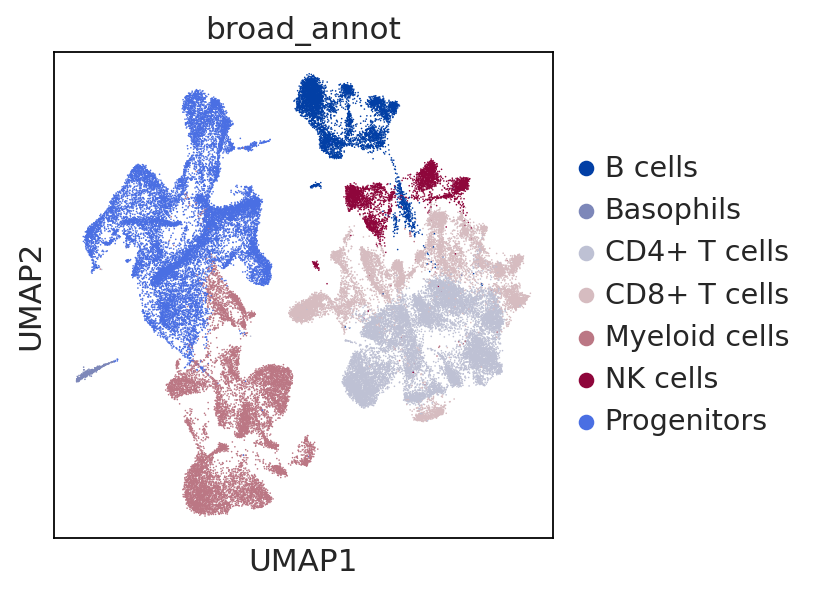

In [157]:
sc.pl.umap(adata1, color="broad_annot")

In [158]:
adata1.write("Greenleaf_large_processed_annot_from_their_paper.h5ad")

In [159]:
adata1.uns['iroot'] = np.flatnonzero(adata1.obs['cell_types']  == '01_HSC_MPP')[0]
sc.tl.dpt(adata1)
sc.tl.paga(adata1, groups="broad_annot")

In [160]:
sc.pp.neighbors(adata1, n_neighbors=20, use_rep='X_diffmap')

In [ ]:
sc.tl.draw_graph(adata1)

In [ ]:
adata1

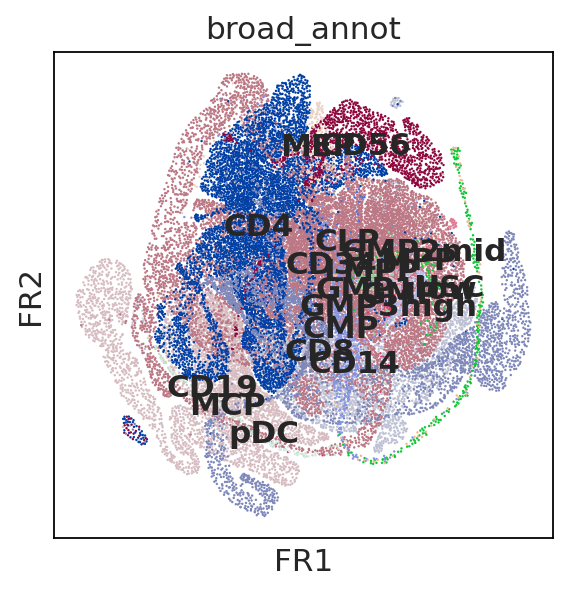

In [126]:
sc.pl.draw_graph(adata1, color='broad_annot', legend_loc='on data')

In [133]:
sc.tl.louvain(adata2, resolution=0.7)

In [134]:
sc.tl.paga(adata2, groups='louvain')

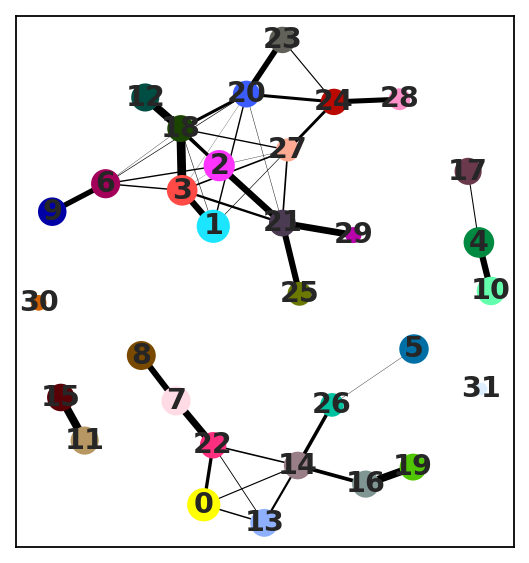

In [135]:
sc.pl.paga(adata2, color=['louvain'])

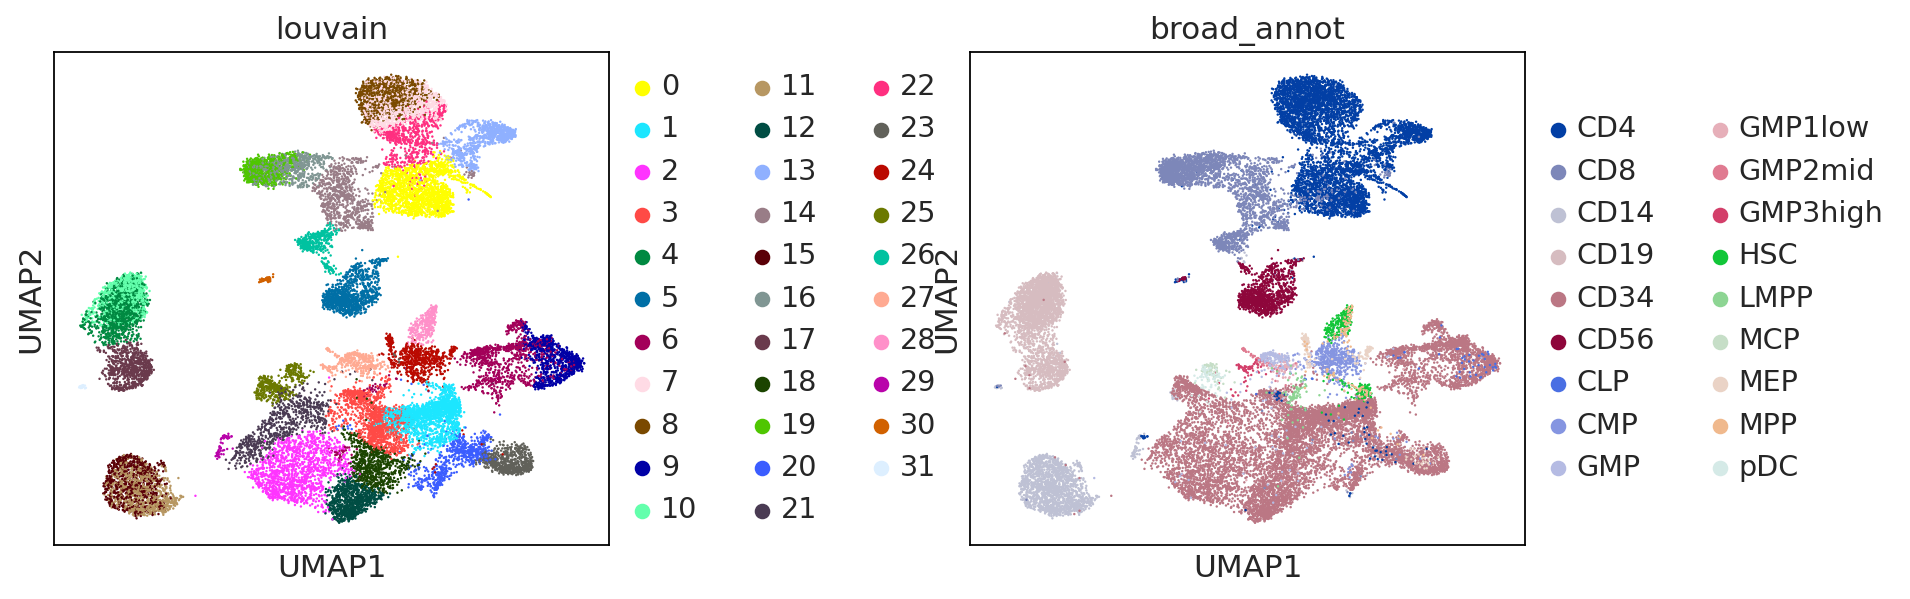

In [136]:
sc.pl.umap(adata2, color=["louvain","broad_annot"], wspace=.5)

{'Cluster1',
 'Cluster10',
 'Cluster11',
 'Cluster12',
 'Cluster13',
 'Cluster14',
 'Cluster15',
 'Cluster16',
 'Cluster17',
 'Cluster18',
 'Cluster19',
 'Cluster2',
 'Cluster20',
 'Cluster21',
 'Cluster22',
 'Cluster23',
 'Cluster24',
 'Cluster25',
 'Cluster26',
 'Cluster27',
 'Cluster28',
 'Cluster29',
 'Cluster3',
 'Cluster30',
 'Cluster31',
 'Cluster4',
 'Cluster5',
 'Cluster6',
 'Cluster7',
 'Cluster8',
 'Cluster9'}

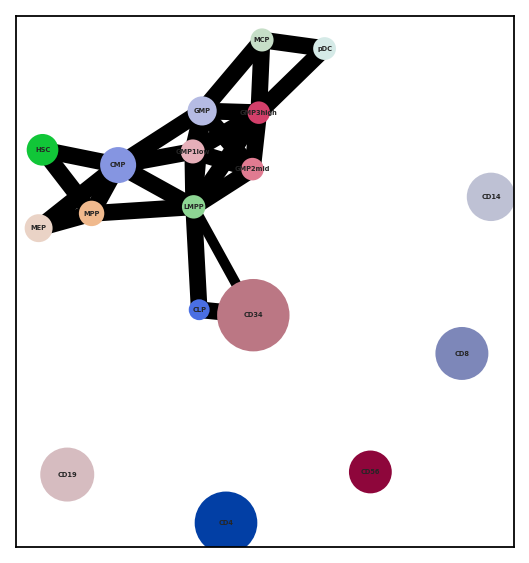

In [122]:
sc.pl.paga(adata2, threshold=0.5, fontsize=3)#, save="_cell_types_20201005.png")

In [116]:
?sc.pl.paga